In [1]:
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

### Single Beads

In [3]:
data = pd.read_csv("NewSingleBeads.csv", sep = ",") 
display(data)

,Parent Sample Name,Summary: Ending O2 ppm,Summary: Laser Power (W),Summary: Measured Pre-Time,Summary: Measured Weld Time,Summary: Robot Travel Speed (mm/s),Summary: Starting O2 ppm,Summary: Total Length,Summary: Wire Feed Speed (mm/s),Summary: Wire Power (kW),...,Fusion zone area (mm^2),Fusion zone width (mm),Fusion zone depth (mm),Fusion zone depth at 50% fusion zone width (mm),Fusion zone depth at 75% fusion zone width (mm),Beta grain length // build (microns),Beta grain length perp. build (microns),Alpha lath thickness (microns),Hardness (HV),"Bead quality (1-intermittent, 2-variable, 3-rippled, 4-smooth)"
0,N00014-001-008,42,6000,2.077,19.106,15.00,41,195.70,40.00,0.3,...,6.326,7.403,1.272,0.5850,0.4015,145.958400,511.295500,NaN,NaN,1
1,N00014-001-010,35,6000,2.079,13.263,15.00,35,105.90,45.00,0.3,...,18.159,9.320,2.725,0.8705,0.5470,234.491200,338.658000,1.382222,NaN,1
2,N00014-001-011,35,6000,2.077,11.408,15.00,35,105.90,50.00,0.3,...,10.737,7.596,2.209,0.4770,0.6465,275.684353,324.221400,1.275000,370.0,1
3,N00014-001-012,34,6000,2.081,13.501,15.00,34,105.90,55.00,0.3,...,12.277,7.565,2.491,0.7370,0.5295,294.074381,854.164000,1.203889,NaN,4
4,N00014-001-013,33,6000,2.077,13.683,15.00,33,105.90,70.00,0.3,...,12.192,7.417,2.496,0.5340,0.3910,258.032692,786.492500,1.338667,NaN,4
5,N00014-001-014,33,6000,2.073,14.211,15.00,33,105.90,62.50,0.3,...,12.439,7.703,2.516,0.7335,0.5025,174.810333,559.417333,1.341778,NaN,3
6,N00014-001-015,32,6000,2.081,13.436,15.00,32,105.90,59.00,0.3,...,12.154,7.590,2.496,0.6570,0.4995,181.519571,430.089500,1.396778,NaN,3
7,N00014-001-016,32,6000,2.077,37.582,3.50,32,105.90,70.00,0.3,...,55.631,10.445,7.000,1.0150,0.8205,491.768789,1544.797000,1.517444,NaN,3
8,N00014-001-017,31,6000,2.074,62.531,3.50,31,105.90,85.00,0.3,...,53.827,10.759,6.560,1.2775,0.9735,602.548444,1135.156500,1.392333,NaN,4
9,N00014-001-018,31,6000,2.085,42.961,3.50,31,105.90,80.00,0.3,...,58.543,10.529,7.115,1.2005,0.8440,584.224812,1100.196000,1.562111,NaN,4


### Removing Redundant Columns

One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings. Let's try to remove redundent features.

In [4]:
# removing sample names
data.drop("Parent Sample Name", axis=1, inplace=True)

In [5]:
import scipy
from scipy.cluster import hierarchy as hc
import matplotlib.pyplot as plt

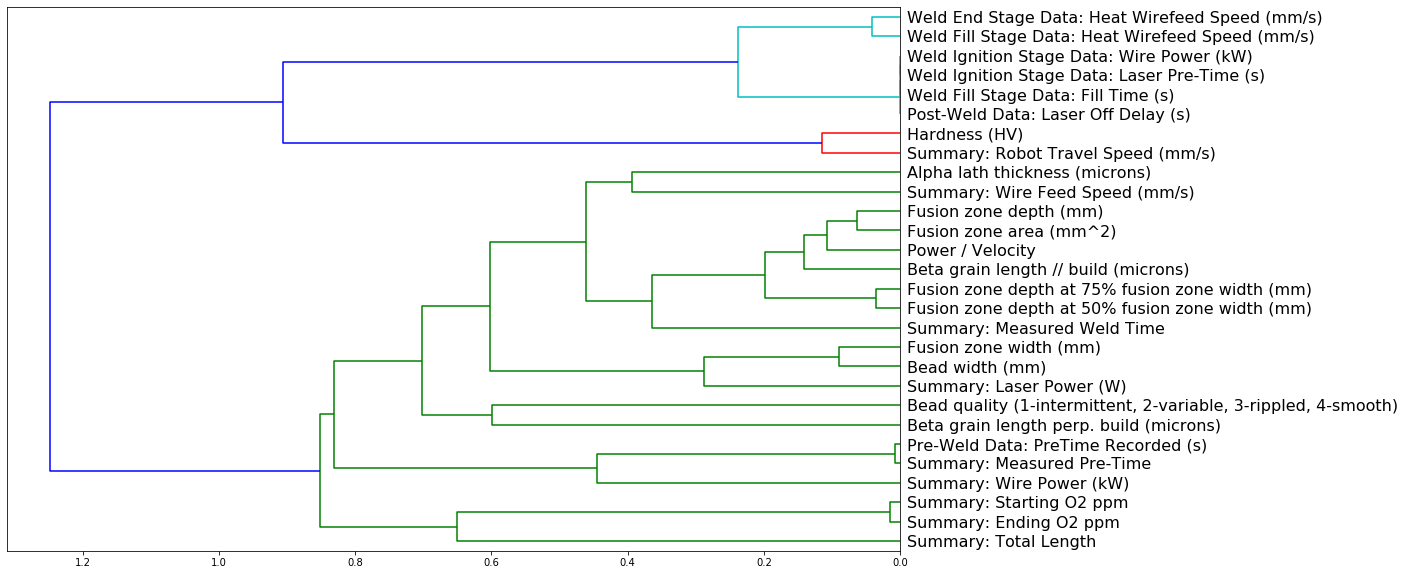

In [6]:
corr = np.round(scipy.stats.spearmanr(data, nan_policy='omit').correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=data.columns, orientation='left', leaf_font_size=16)
plt.show()

In [7]:
# removing similar features 
data.drop("Weld Fill Stage Data: Fill Time (s)", axis=1, inplace=True)
data.drop("Weld Ignition Stage Data: Laser Pre-Time (s)", axis=1, inplace=True)
data.drop("Post-Weld Data: Laser Off Delay (s)", axis=1, inplace=True)
data.drop("Pre-Weld Data: PreTime Recorded (s)", axis=1, inplace=True)
data.drop("Summary: Ending O2 ppm", axis=1, inplace=True)

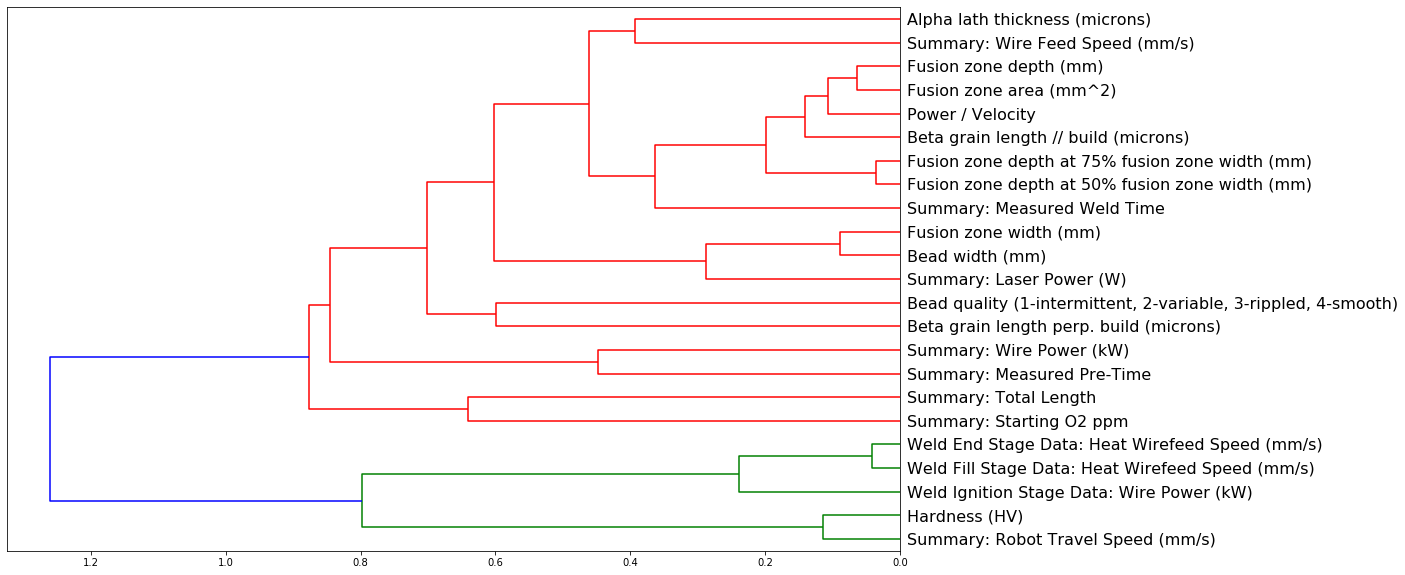

In [8]:
corr = np.round(scipy.stats.spearmanr(data, nan_policy='omit').correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=data.columns, orientation='left', leaf_font_size=16)
plt.show()

### After Cleaning Data

In [9]:
# % of NaNs
data.isnull().sum()/len(data)

Summary: Laser Power (W)                                          0.000000
Summary: Measured Pre-Time                                        0.000000
Summary: Measured Weld Time                                       0.000000
Summary: Robot Travel Speed (mm/s)                                0.000000
Summary: Starting O2 ppm                                          0.000000
Summary: Total Length                                             0.000000
Summary: Wire Feed Speed (mm/s)                                   0.000000
Summary: Wire Power (kW)                                          0.000000
Weld Ignition Stage Data: Wire Power (kW)                         0.000000
Weld Fill Stage Data: Heat Wirefeed Speed (mm/s)                  0.000000
Weld End Stage Data: Heat Wirefeed Speed (mm/s)                   0.000000
Power / Velocity                                                  0.000000
Bead width (mm)                                                   0.039216
Fusion zone area (mm^2)  

### Random Forest 

- We now have something we can pass to a random forest!

### Bead Width

In [10]:
subdata = data.loc[:, 'Summary: Laser Power (W)':'Bead width (mm)']
subdata = subdata.dropna()
subdata.isnull().sum()/len(subdata)

Summary: Laser Power (W)                            0.0
Summary: Measured Pre-Time                          0.0
Summary: Measured Weld Time                         0.0
Summary: Robot Travel Speed (mm/s)                  0.0
Summary: Starting O2 ppm                            0.0
Summary: Total Length                               0.0
Summary: Wire Feed Speed (mm/s)                     0.0
Summary: Wire Power (kW)                            0.0
Weld Ignition Stage Data: Wire Power (kW)           0.0
Weld Fill Stage Data: Heat Wirefeed Speed (mm/s)    0.0
Weld End Stage Data: Heat Wirefeed Speed (mm/s)     0.0
Power / Velocity                                    0.0
Bead width (mm)                                     0.0
dtype: float64

### Fusion Zone Area

In [74]:
subdata = data.loc[:, 'Summary: Laser Power (W)':'Fusion zone area (mm^2)']
subdata.drop("Bead width (mm)", axis=1, inplace=True)
subdata.isnull().sum()/len(subdata)

Summary: Laser Power (W)                            0.0
Summary: Measured Pre-Time                          0.0
Summary: Measured Weld Time                         0.0
Summary: Robot Travel Speed (mm/s)                  0.0
Summary: Starting O2 ppm                            0.0
Summary: Total Length                               0.0
Summary: Wire Feed Speed (mm/s)                     0.0
Summary: Wire Power (kW)                            0.0
Weld Ignition Stage Data: Wire Power (kW)           0.0
Weld Fill Stage Data: Heat Wirefeed Speed (mm/s)    0.0
Weld End Stage Data: Heat Wirefeed Speed (mm/s)     0.0
PV_Ratio                                            0.0
Fusion zone area (mm^2)                             0.0
dtype: float64

### Fusion Zone Width

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Fusion zone width (mm)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)                

### Fusion Zone Depth

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Fusion zone depth (mm)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)

### Depth at 50% Width

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Fusion zone depth at 50% fusion zone width (mm)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth (mm)", axis=1, inplace=True)

### Depth at 75% Width

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Fusion zone depth at 75% fusion zone width (mm)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 50% fusion zone width (mm)", axis=1, inplace=True)

### Beta Grain Length // Build

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Beta grain length // build (microns)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 50% fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 75% fusion zone width (mm)", axis=1, inplace=True)

### Beta Grain Length perpendicular to Build

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Beta grain length perp. build (microns)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 50% fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 75% fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Beta grain length // build (microns)", axis=1, inplace=True)

### Hardness

In [22]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Hardness (HV)']
subdata = subdata[np.isfinite(subdata['Hardness (HV)'])]
subdata.drop("Alpha lath thickness (microns)", axis=1, inplace=True)
display(subdata)

,Summary: Laser Power (W),Summary: Measured Pre-Time,Summary: Measured Weld Time,Summary: Robot Travel Speed (mm/s),Summary: Starting O2 ppm,Summary: Total Length,Summary: Wire Feed Speed (mm/s),Summary: Wire Power (kW),Weld Ignition Stage Data: Wire Power (kW),Weld Fill Stage Data: Heat Wirefeed Speed (mm/s),...,Power / Velocity,Bead width (mm),Fusion zone area (mm^2),Fusion zone width (mm),Fusion zone depth (mm),Fusion zone depth at 50% fusion zone width (mm),Fusion zone depth at 75% fusion zone width (mm),Beta grain length // build (microns),Beta grain length perp. build (microns),Hardness (HV)
2,6000,2.077,11.408,15.00,35,105.90,50.00,0.3,0.3,59.25,...,420.000000,7.447,10.737,7.596,2.209,0.4770,0.6465,275.684353,324.221400,370.0
12,6000,1.343,74.908,3.00,82,113.55,55.00,0.3,0.3,10.00,...,2100.000000,8.440,44.479,8.550,6.474,1.1335,0.8560,575.875200,1025.526000,349.0
13,6000,3.057,63.074,2.00,79,113.55,55.00,0.3,0.3,10.00,...,3150.000000,10.143,64.915,9.275,7.912,1.2760,0.9390,650.096000,1240.543400,340.0
20,3000,2.077,62.538,3.50,80,195.70,15.00,0.0,0.3,59.25,...,857.142857,7.163,15.019,7.198,2.865,1.0280,0.7425,292.010222,825.591500,365.0
21,6000,2.073,19.521,15.00,75,195.70,90.00,0.6,0.3,59.25,...,440.000000,7.407,16.045,7.353,3.088,0.6775,0.5605,205.345556,857.171500,371.0
26,6000,1.345,186.918,6.67,49,103.32,59.00,0.0,0.1,10.00,...,899.550225,11.900,37.692,11.925,4.180,1.4455,1.0430,376.800000,927.000000,358.0
27,6000,107.460,19.729,6.58,61,103.32,59.25,0.3,0.1,10.00,...,957.446809,7.810,25.642,7.966,4.531,1.0875,0.7985,337.944444,1424.400000,363.0
28,3000,17.007,35.091,3.50,52,103.32,59.25,0.9,0.1,10.00,...,1114.285714,6.130,38.461,5.858,7.760,0.8080,0.8020,514.909091,1131.272727,358.0
29,3000,1.339,33.555,3.50,49,103.32,65.00,0.9,0.1,10.00,...,1114.285714,6.890,43.613,6.742,7.597,1.2775,0.9675,635.523809,1077.272727,350.0
33,3000,16.714,34.271,3.50,42,103.32,85.00,0.9,0.1,10.00,...,1114.285714,8.270,52.020,5.996,8.255,1.1660,0.8350,695.478261,1170.400000,345.0


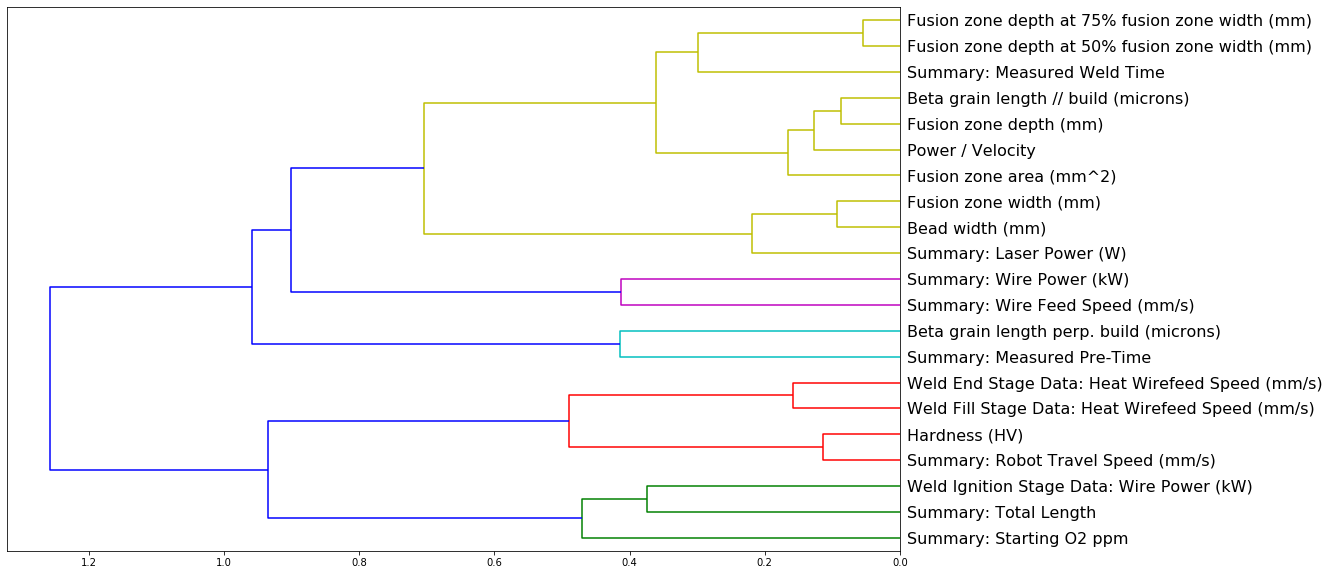

In [23]:
corr = np.round(scipy.stats.spearmanr(subdata, nan_policy='omit').correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=subdata.columns, orientation='left', leaf_font_size=16)
plt.show()

### Training of Model

In [24]:
X = subdata.iloc[:, 0:20].values
y = subdata.iloc[:, 20].values

#X = subdata.iloc[:, 0:12].values
#y = subdata.iloc[:, 12].values

# n_jobs = -1 : use all the cores
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X, y)
m.score(X,y)

CPU times: user 108 ms, sys: 37.1 ms, total: 145 ms
Wall time: 138 ms


0.9720137153839434

All data used for training the model

In [25]:
# splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# function to calculate score for both datasets
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [114]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 107 ms, sys: 33.6 ms, total: 141 ms
Wall time: 140 ms
[2.748486856435734, 0.6021350900476414, 0.9503537066246058, 0.9951586053412461]


## Reducing over-fitting

In [40]:
# Function to calculate the depth of the tree
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

Let's get a baseline for this full set to compare to.

In [115]:
m = RandomForestRegressor(n_estimators=200, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 257 ms, sys: 67.4 ms, total: 325 ms
Wall time: 325 ms
[2.5239869254811946, 1.7005636320545905, 0.9581328207150367, 0.9613839020771509, 0.6545289496131577]


In [116]:
t=m.estimators_[0].tree_

In [117]:
dectree_max_depth(t)

4

### Minimum samples in a leaf node

In [122]:
m = RandomForestRegressor(n_estimators=200, min_samples_leaf=1, n_jobs=-1, 
                          oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 261 ms, sys: 68.5 ms, total: 330 ms
Wall time: 322 ms
[2.779869601258303, 1.4107444843060641, 0.9492134923764458, 0.973424629080119, 0.6116360177033335]


In [123]:
t=m.estimators_[0].tree_

In [124]:
dectree_max_depth(t)

3

### Max features at a node

In [28]:
m = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1, 
                          max_features=0.3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1.24 s, sys: 330 ms, total: 1.57 s
Wall time: 1.38 s
[2.750760858380827, 1.681900611411582, 0.9502715214248159, 0.96222684421365, 0.596696818666751]


In [170]:
t=m.estimators_[0].tree_

In [171]:
dectree_max_depth(t)

4

### Actual vs Predicted Vaues

In [31]:
%time preds = np.stack([t.predict(X_test) for t in m.estimators_])

# saving validation dataset as a dataframe, with predictions and SD(predictions)
df=pd.DataFrame(data=X_test[0:,0:],index=[i for i in range(X_test.shape[0])],
                columns=['f'+str(i) for i in range(X_test.shape[1])])
df['f30'] = y_test
df.columns = list(subdata.columns) 
df['pred'] = np.mean(preds, axis=0)
df['pred_std'] = np.std(preds, axis=0)
df.head()

CPU times: user 60.7 ms, sys: 10.2 ms, total: 70.9 ms
Wall time: 62.5 ms


,Summary: Laser Power (W),Summary: Measured Pre-Time,Summary: Measured Weld Time,Summary: Robot Travel Speed (mm/s),Summary: Starting O2 ppm,Summary: Total Length,Summary: Wire Feed Speed (mm/s),Summary: Wire Power (kW),Weld Ignition Stage Data: Wire Power (kW),Weld Fill Stage Data: Heat Wirefeed Speed (mm/s),...,Fusion zone area (mm^2),Fusion zone width (mm),Fusion zone depth (mm),Fusion zone depth at 50% fusion zone width (mm),Fusion zone depth at 75% fusion zone width (mm),Beta grain length // build (microns),Beta grain length perp. build (microns),Hardness (HV),pred,pred_std
0,6000.0,107.460,19.729,6.58,61.0,103.32,59.25,0.3,0.1,10.00,...,25.642,7.966,4.531,1.0875,0.7985,337.944444,1424.400000,363.0,362.351,11.043722
1,6000.0,3.743,63.221,3.50,53.0,115.36,100.00,0.9,0.1,10.00,...,62.301,10.463,7.359,2.5015,1.8370,444.150000,505.833333,350.0,352.832,9.477963
2,6000.0,2.073,19.521,15.00,75.0,195.70,90.00,0.6,0.3,59.25,...,16.045,7.353,3.088,0.6775,0.5605,205.345556,857.171500,371.0,370.788,7.125802


In [32]:
df.to_csv('Predicted.csv', index = False)

# Feature importance

Random shuffling of the variable 

In [29]:
df_trn = subdata.iloc[:, 0:20]
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(m, df_trn); fi[:20]

,cols,imp
18,Beta grain length // build (microns),0.180667
13,Fusion zone area (mm^2),0.154889
15,Fusion zone depth (mm),0.118254
11,Power / Velocity,0.108294
3,Summary: Robot Travel Speed (mm/s),0.069304
2,Summary: Measured Weld Time,0.064927
17,Fusion zone depth at 75% fusion zone width (mm),0.062297
19,Beta grain length perp. build (microns),0.060350
16,Fusion zone depth at 50% fusion zone width (mm),0.038942
6,Summary: Wire Feed Speed (mm/s),0.028659


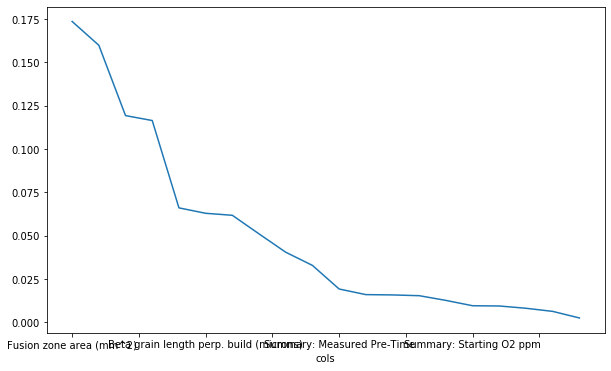

In [173]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

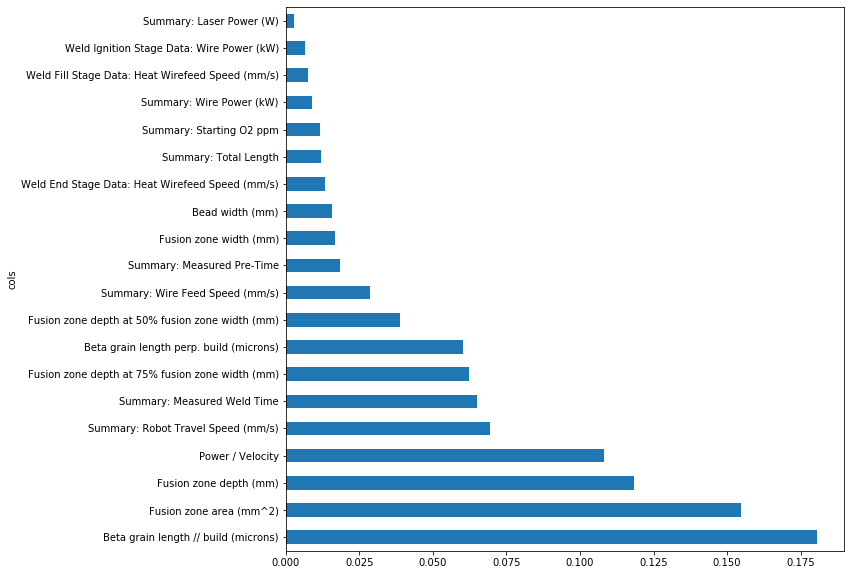

In [30]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(10,10), legend=False)
plot_fi(fi[:20]);